- Homework2
- **This homework focuses on training and evaluating prediction models for a particular problem and dataset.**
- **In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction.**
- The goal in this homework is to work with the data to build and evaluate prediction models that capture the relationship between the descriptive features and the target feature **death_yn**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
df = pd.read_csv(r"C:\Users\35385\Desktop\CS_Spring2024\DataAnal\Homework2\new_features_df1.csv", keep_default_na=True, delimiter=",", skipinitialspace=True, encoding="Windows-1252")

In [94]:
object_columns = df.select_dtypes(["object"]).columns #select all columns of type "object"
categorical_columns = object_columns

for column in categorical_columns: #convert selected columns to type "category"
    df[column] = df[column].astype("category")
df.info() #check changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39947 entries, 0 to 39946
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_month             39947 non-null  category
 1   res_state              39947 non-null  category
 2   age_group              39947 non-null  category
 3   sex                    39947 non-null  category
 4   race                   39947 non-null  category
 5   ethnicity              39947 non-null  category
 6   hosp_yn                39947 non-null  category
 7   death_yn               39947 non-null  category
 8   county_frequency_size  39947 non-null  category
 9   party                  39947 non-null  category
 10  Profile                39947 non-null  category
 11  seasons                39947 non-null  category
dtypes: category(12)
memory usage: 475.0 KB


In [95]:
df.head(10)

,case_month,res_state,age_group,sex,race,ethnicity,hosp_yn,death_yn,county_frequency_size,party,Profile,seasons
0,2020-04-01,CA,65+ years,_M,White,Non_H/L,Yes,Yes,Medium,DEMOCRAT,65+ years_White__M_Non_H/L,Spring
1,2020-03-01,NY,65+ years,_F,White,Non_H/L,Yes,Yes,Medium,DEMOCRAT,65+ years_White__F_Non_H/L,Spring
2,2021-09-01,FL,65+ years,_F,White,Non_H/L,No,Yes,Medium,DEMOCRAT,65+ years_White__F_Non_H/L,Fall
3,2020-07-01,TX,50 to 64 years,_M,White,H/L,Yes,Yes,Very_Large,DEMOCRAT,50 to 64 years_White__M_H/L,Summer
4,2020-12-01,AZ,65+ years,_M,White,H/L,Yes,Yes,Small,DEMOCRAT,65+ years_White__M_H/L,Winter
5,2020-11-01,WI,65+ years,_F,White,Non_H/L,Yes,Yes,Medium,REPUBLICAN,65+ years_White__F_Non_H/L,Fall
6,2020-05-01,MD,65+ years,_F,White,Non_H/L,No,Yes,Small,DEMOCRAT,65+ years_White__F_Non_H/L,Spring
7,2020-11-01,MN,65+ years,_M,White,Non_H/L,No,Yes,Small,DEMOCRAT,65+ years_White__M_Non_H/L,Fall
8,2021-02-01,NY,65+ years,_M,White,Non_H/L,No,Yes,Huge,DEMOCRAT,65+ years_White__M_Non_H/L,Winter
9,2020-05-01,NY,65+ years,_F,White,Non_H/L,No,Yes,Huge,DEMOCRAT,65+ years_White__F_Non_H/L,Spring


(1). [25] **Data Understanding and Preparation:** Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set.

(1.1) Split the dataset into two datasets: 70% training and 30% test. Keep the test set aside. 

- Note that this training set is very small and the model will not be very reliable due to this sample size problem.
- If we want to get the same train/test split every time we run, we can set the random_state variable to a fixed value

In [96]:
X = df.drop(columns=['death_yn'])  # Features
y = df['death_yn']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
        case_month res_state       age_group sex   race ethnicity hosp_yn  \
36228  2020-12-01        IN  50 to 64 years  _M  White   Non_H/L      No   
11671  2022-01-01        OR  50 to 64 years  _M  White   Non_H/L      No   
12993  2022-06-01        KY       65+ years  _M  White   Non_H/L      No   
17552  2020-11-01        MI  50 to 64 years  _M  White   Non_H/L      No   
4017   2020-03-01        WA       65+ years  _F  White   Non_H/L      No   
...           ...       ...             ...  ..    ...       ...     ...   
7813   2020-11-01        MN       65+ years  _F  White   Non_H/L     Yes   
32511  2020-11-01        UT  18 to 49 years  _F  White   Non_H/L      No   
5192   2020-07-01        AZ       65+ years  _F  White   Non_H/L     Yes   
12172  2021-03-01        NC  18 to 49 years  _M  White   Non_H/L      No   
33003  2022-05-01        NY  18 to 49 years  _F  White   Non_H/L      No   

      county_frequency_size       party                          Profil

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


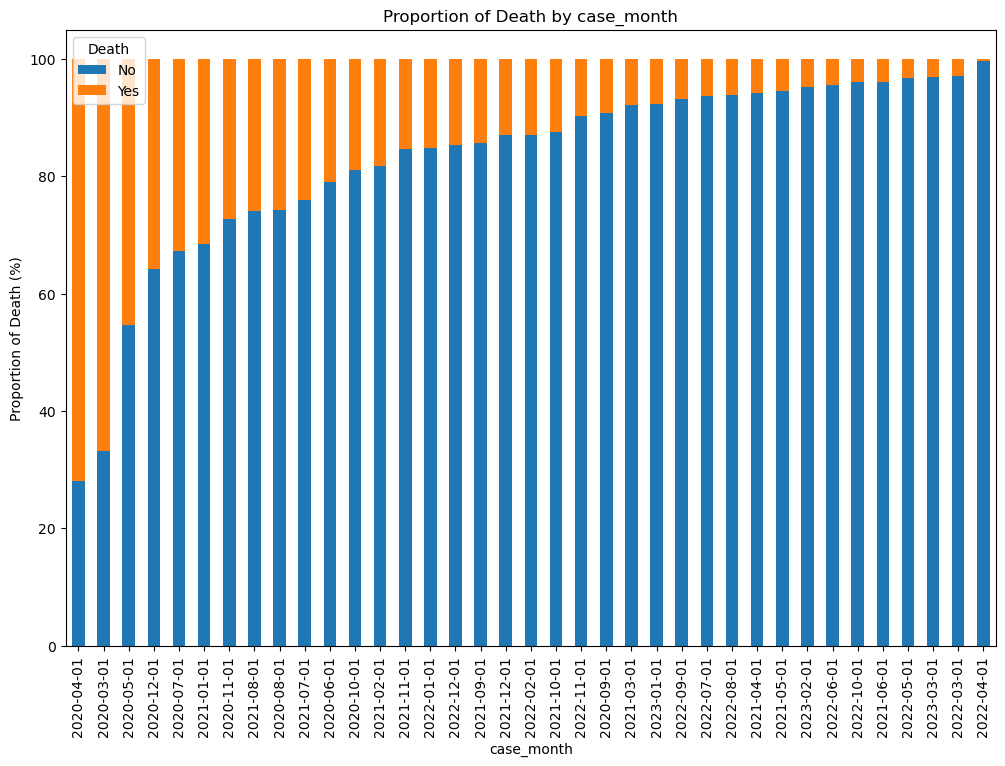

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


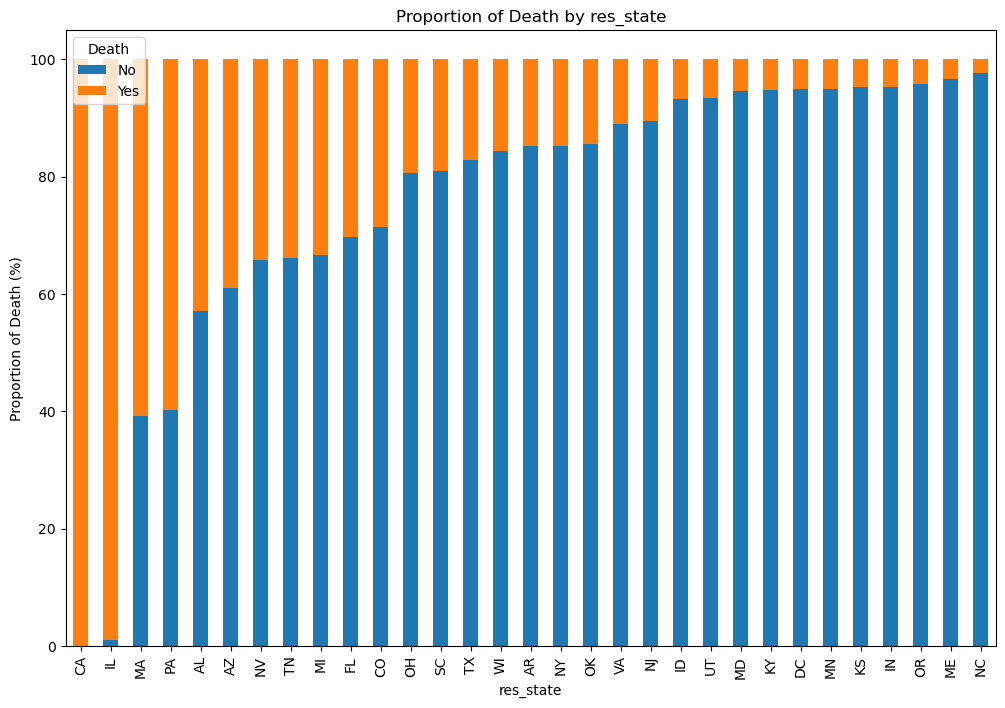

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


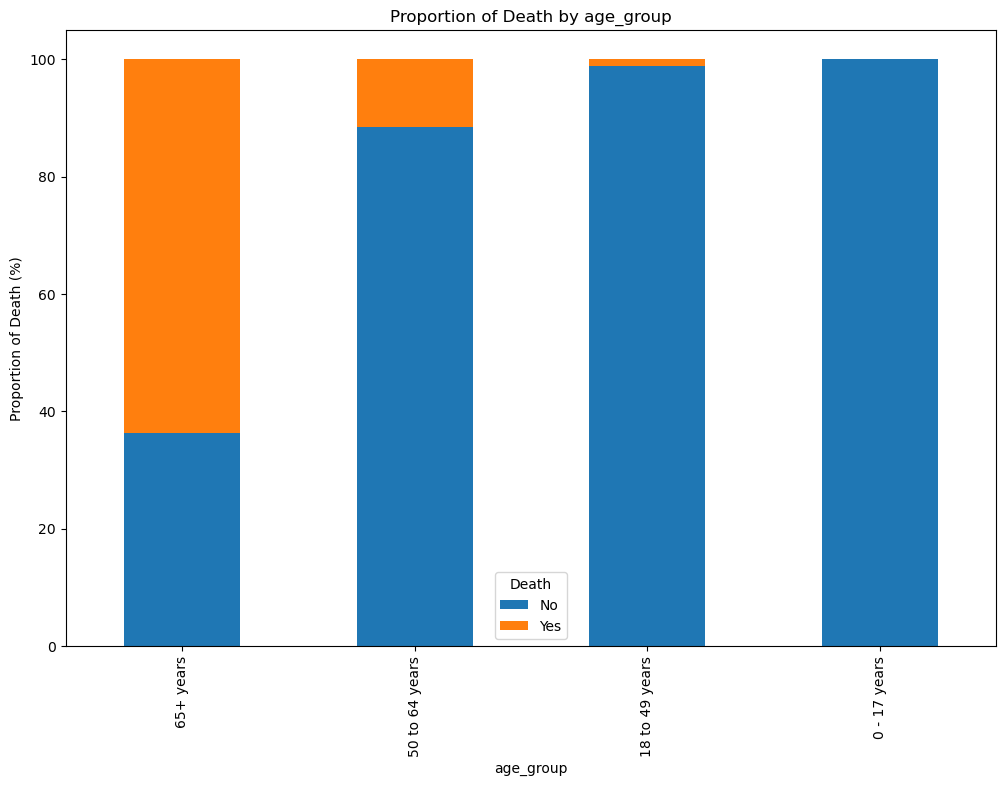

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


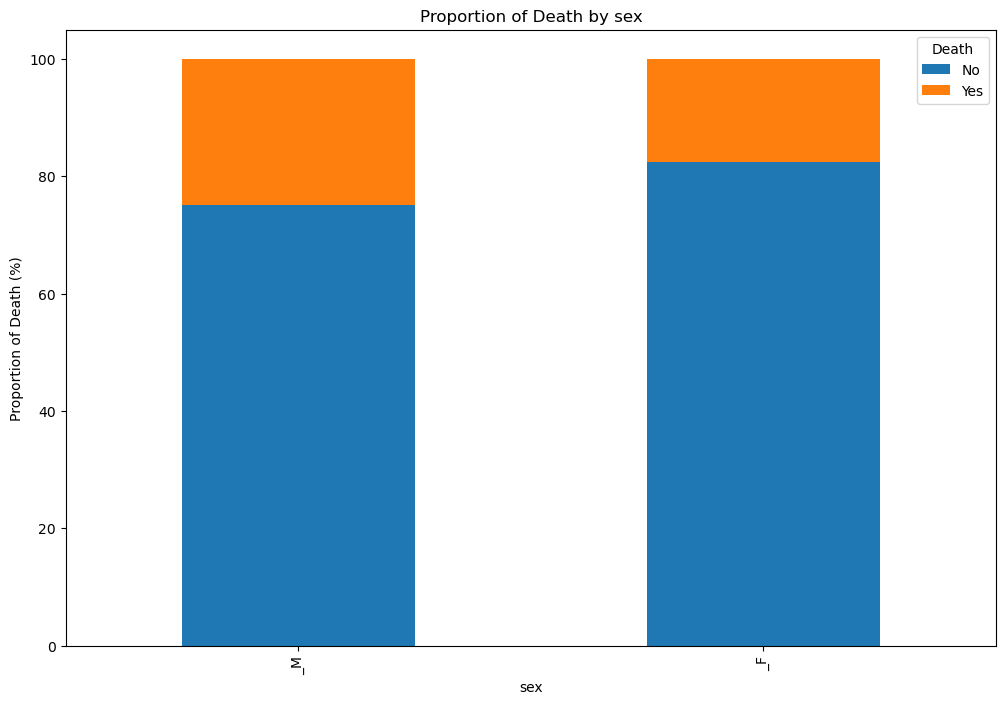

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


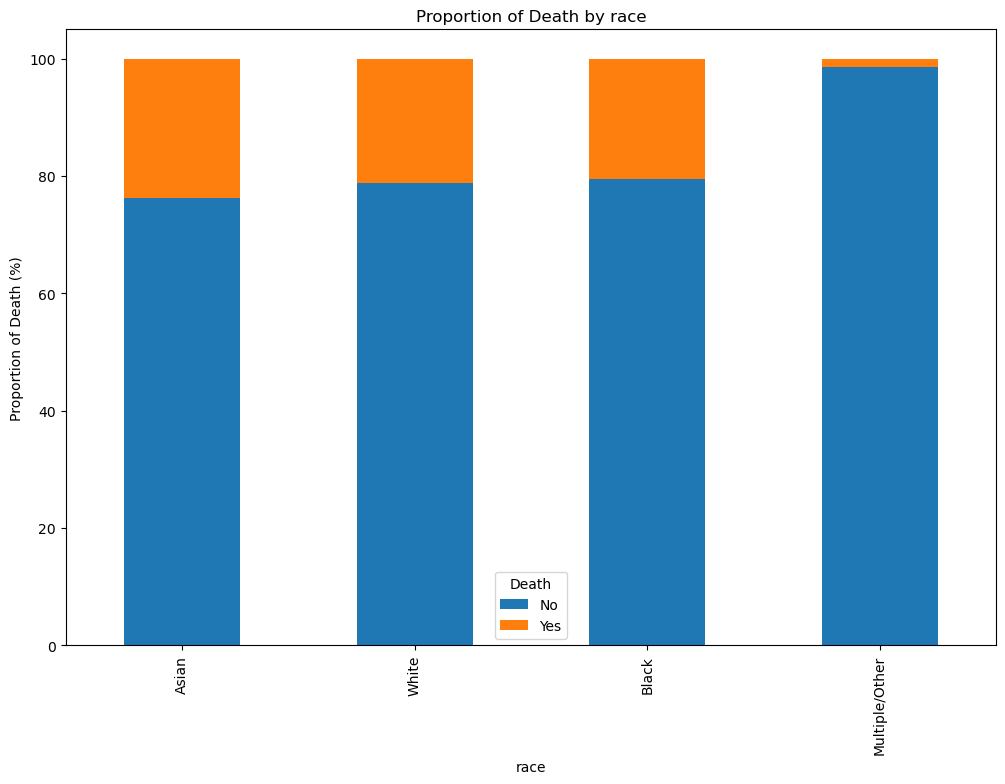

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


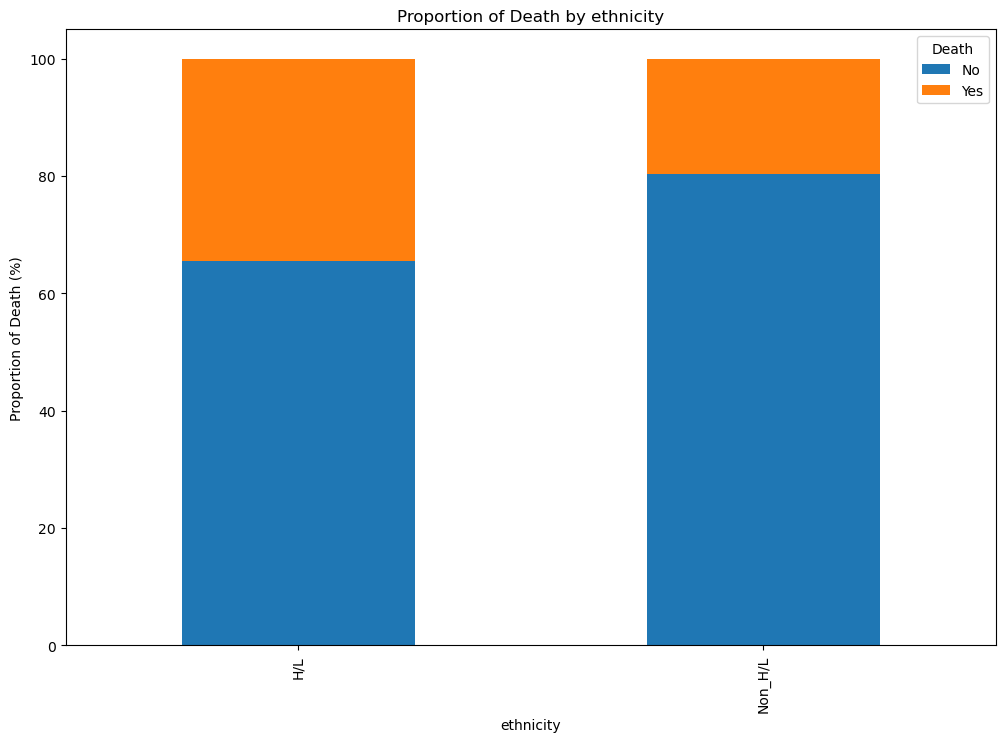

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


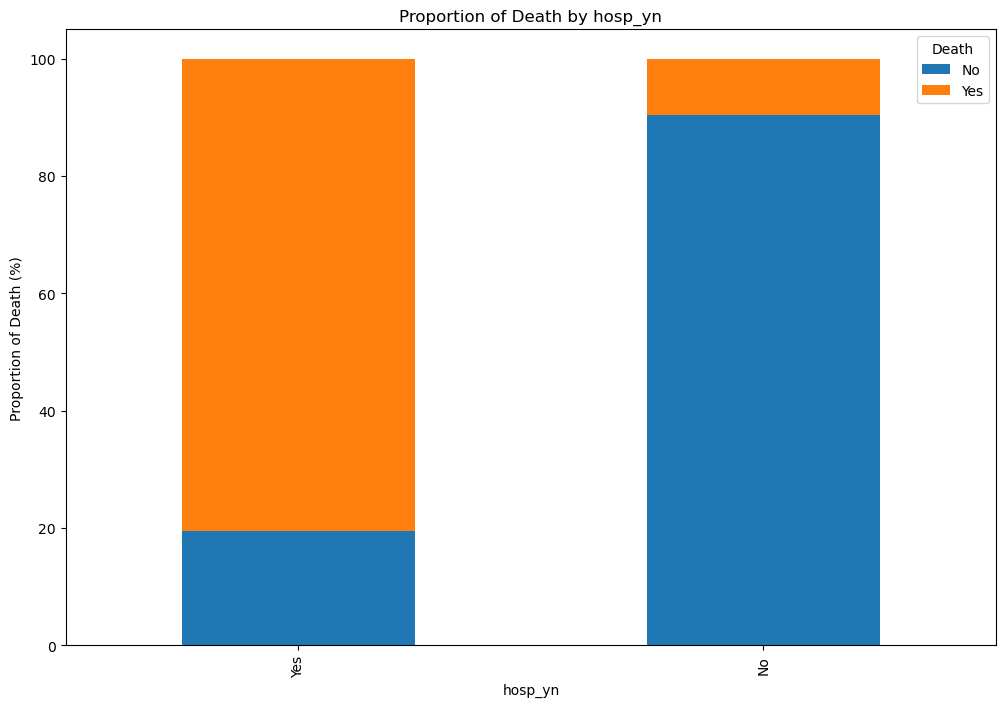

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


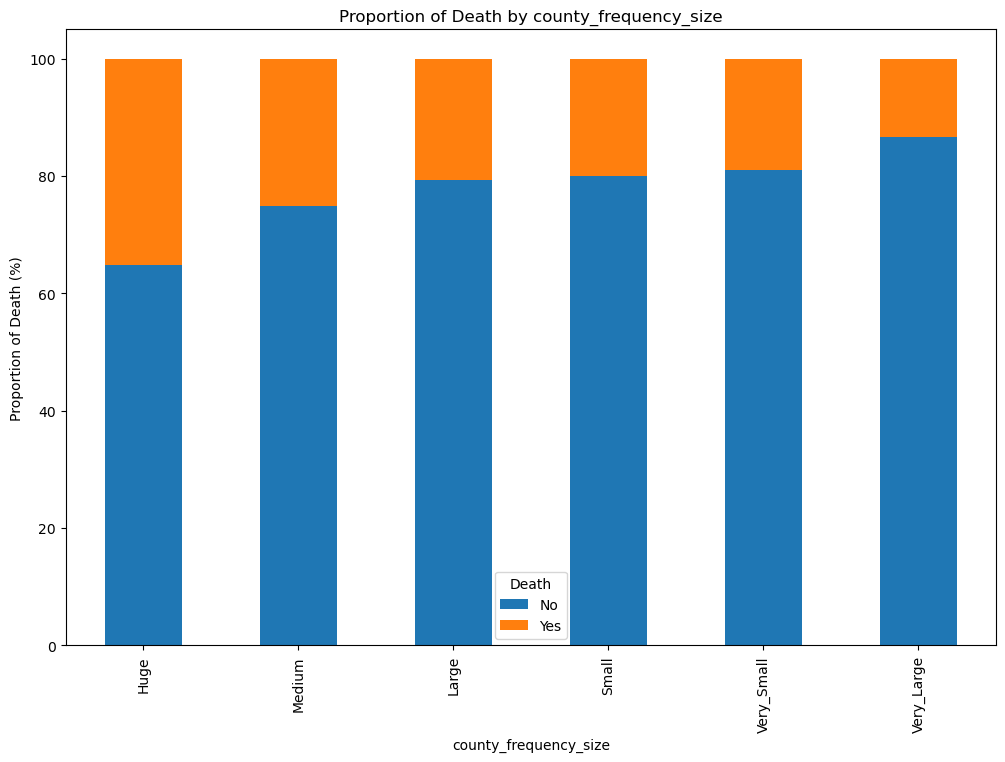

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


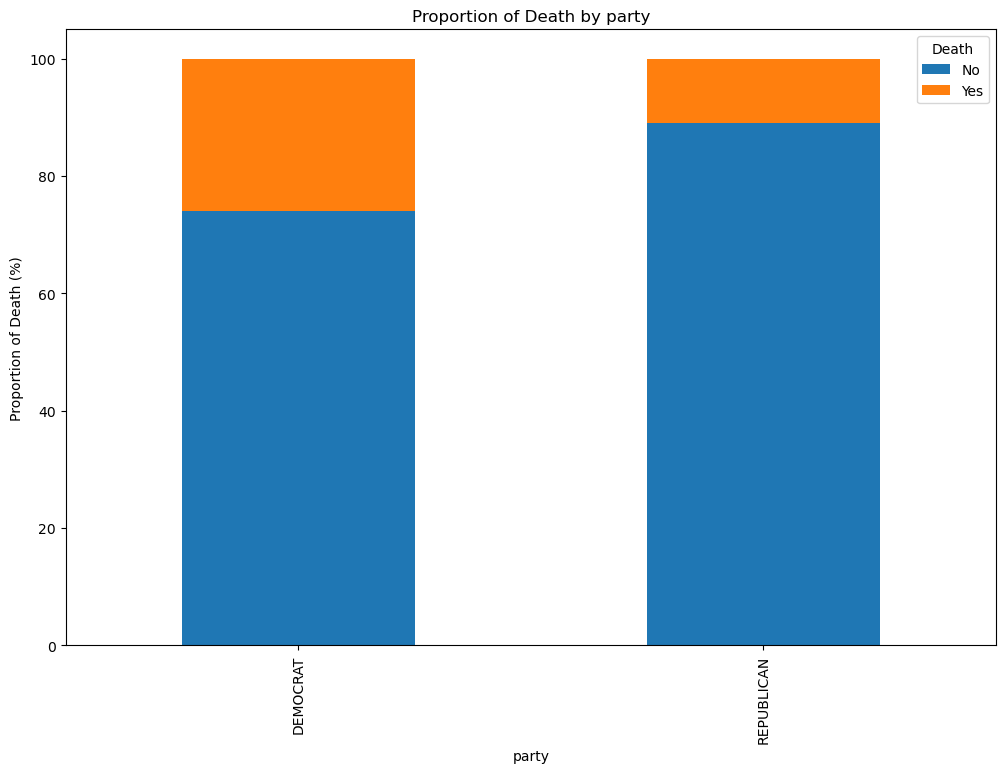

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


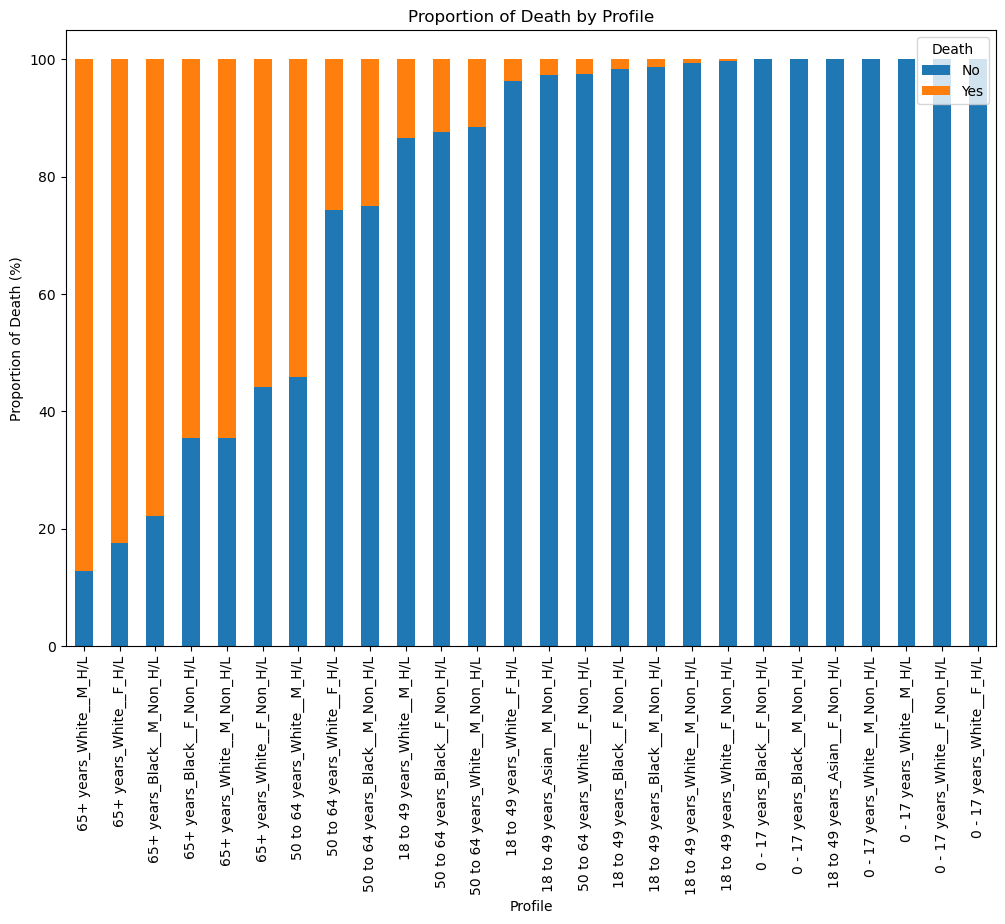

C:\Users\35385\AppData\Local\Temp\ipykernel_30280\2180910000.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)


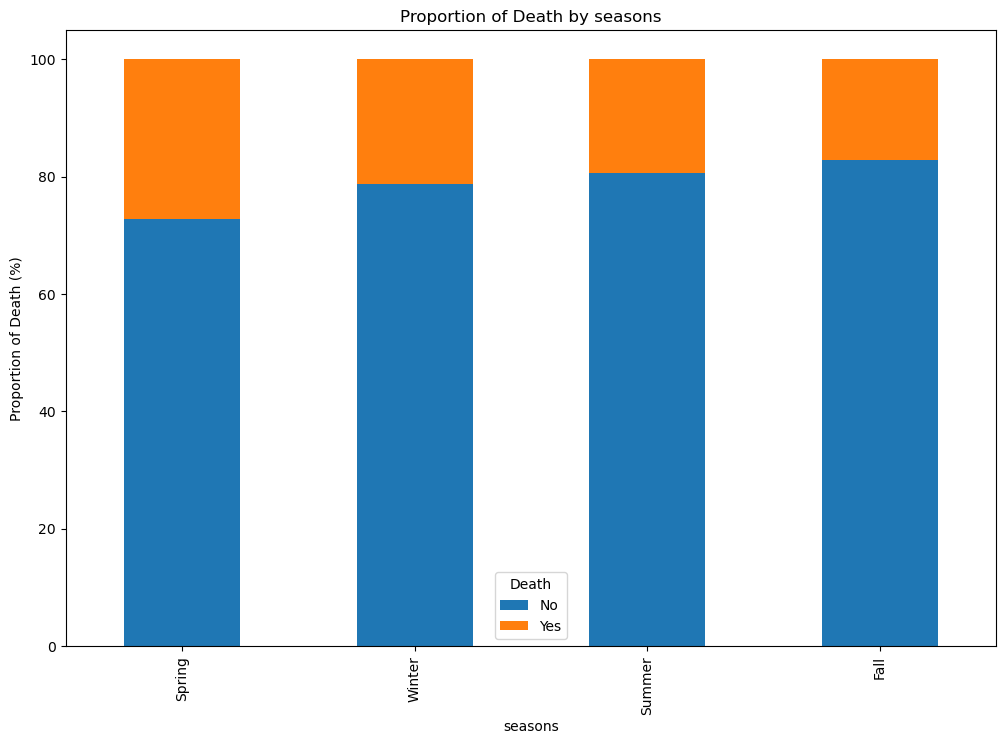

In [97]:
train_data = pd.concat([X_train, y_train], axis=1)


def plot_proportion_of_death(input, feature):
    # Calculate overall counts for each value in the feature
    overall_counts = input[feature].value_counts()

    # Filter features where overall count for any value is greater than 120: 1% of the data
    valid_features = overall_counts[overall_counts > 120].index.tolist()

    # Check if the feature has enough valid values
    if len(valid_features) <0:
        print(f"No values in feature '{feature}' have overall count greater than 50.")
        return

    # Calculate counts of "Yes" and "No" for each feature
    death_counts = input.groupby(feature)['death_yn'].value_counts().unstack(fill_value=0)

    # Filter out only the valid values in the feature
    death_counts = death_counts.loc[valid_features]

    # Calculate proportion of death per feature category
    proportion_death_feature = death_counts.div(death_counts.sum(axis=1), axis=0) * 100

    # Sort based on highest death "Yes" proportion
    sorted_feature = proportion_death_feature.sort_values(by="Yes", ascending=False)

    # Plotting
    sorted_feature.plot(kind="bar", stacked=True, figsize=(12, 8))
    plt.title(f"Proportion of Death by {feature}")
    plt.ylabel("Proportion of Death (%)")
    plt.xlabel(feature)
    plt.legend(title="Death")
    # plt.xticks(rotation=45)
    plt.show()

# Example usage:
# Assuming train_data contains both X_train and y_train concatenated
for column in X_train.columns:
    plot_proportion_of_death(train_data, column)


 - Discuss what  knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.

    - (2.1) On the training set, train a linear regression model to predict the target feature, using only the  descriptive features selected in exercise (1) above. 

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Define column transformer to one-hot encode categorical variables
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['case_month', 'res_state', 'age_group', 'sex', 'race', 'ethnicity', 'hosp_yn', 'county_frequency_size', 'party', 'Profile', 'seasons'])],
    remainder='passthrough'
)

# Define the linear regression model
linear_reg_model = LinearRegression()

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('model', linear_reg_model)
])

# Train the model
pipeline.fit(X_train, y_train_encoded)

# Predict on the training set
y_train_pred = pipeline.predict(X_train)

# Model evaluation
mse_train = mean_squared_error(y_train_encoded, y_train_pred)
r2_train = r2_score(y_train_encoded, y_train_pred)

print("Training set evaluation:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R2) Score:", r2_train)


Training set evaluation:
Mean Squared Error (MSE): 0.052936933899495574
R-squared (R2) Score: 0.6805100816301406
